In [1]:
library(ggplot2)
library(dplyr)
library(pivottabler)
library(data.table)
library(sjmisc)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'pivottabler' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'sjmisc' was built under R version 3.6.3"

In [2]:
birth_rates <- read.csv("birth-rate.csv")
head(birth_rates)

Country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,...,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008
Aruba,36.40000,35.179,33.863,32.459,30.994,29.51300,28.069,26.721,25.518,...,15.02400,14.5280,14.04100,13.57900,13.15300,12.77200,12.44100,12.15900,11.91900,11.71600
Afghanistan,52.20100,52.206,52.208,52.204,52.192,52.16800,52.130,52.076,52.006,...,51.22900,50.9030,50.48600,49.98400,49.41600,48.80300,48.17700,47.57500,47.02300,46.53800
Angola,54.43200,54.394,54.317,54.199,54.040,53.83600,53.585,53.296,52.984,...,48.66200,48.3550,48.00500,47.54500,46.93600,46.18400,45.33000,44.44400,43.60700,42.87500
Albania,40.88600,40.312,39.604,38.792,37.913,37.00800,36.112,35.245,34.421,...,17.71300,16.8500,16.08100,15.44400,14.96200,14.64400,14.48500,14.46400,14.53400,14.64900
Netherlands Antilles,32.32100,30.987,29.618,28.229,26.849,25.51800,24.280,23.173,22.230,...,15.80900,15.4120,15.09600,14.82400,14.56500,14.30900,14.05100,13.79000,13.53200,13.28100
Arab World,47.61122,NA,NA,NA,NA,46.57288,NA,NA,NA,...,29.07314,28.6828,28.30524,27.96244,27.67007,27.37897,27.11886,26.85532,26.59352,26.32405


In [3]:
birth_rates_USA <- birth_rates %>% 
  dplyr::filter(Country =='United States')
birth_rates_USA <- subset(birth_rates_USA, select = - c(Country))
names(birth_rates_USA) <- sub("^X", "", names(birth_rates_USA))
head(birth_rates_USA)

1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
23.7,23.3,22.4,21.7,21.1,19.4,18.4,17.8,17.6,17.9,...,14.5,14.7,14.1,13.9,14.14,14.13,14,14.2,14.25406,14.30096


In [4]:
birth_rates_USA_pivot <- rotate_df(birth_rates_USA)
head(birth_rates_USA_pivot)

,1
1960,23.7
1961,23.3
1962,22.4
1963,21.7
1964,21.1
1965,19.4


In [5]:
birth_rates_USA_pivot$year <- rownames(birth_rates_USA_pivot)
birth_rates_USA_pivot$birth_rate <- birth_rates_USA_pivot$"1"
birth_rates_USA_pivot <- subset(birth_rates_USA_pivot, select = -c(1))

head(birth_rates_USA_pivot)

,year,birth_rate
1960,1960,23.7
1961,1961,23.3
1962,1962,22.4
1963,1963,21.7
1964,1964,21.1
1965,1965,19.4


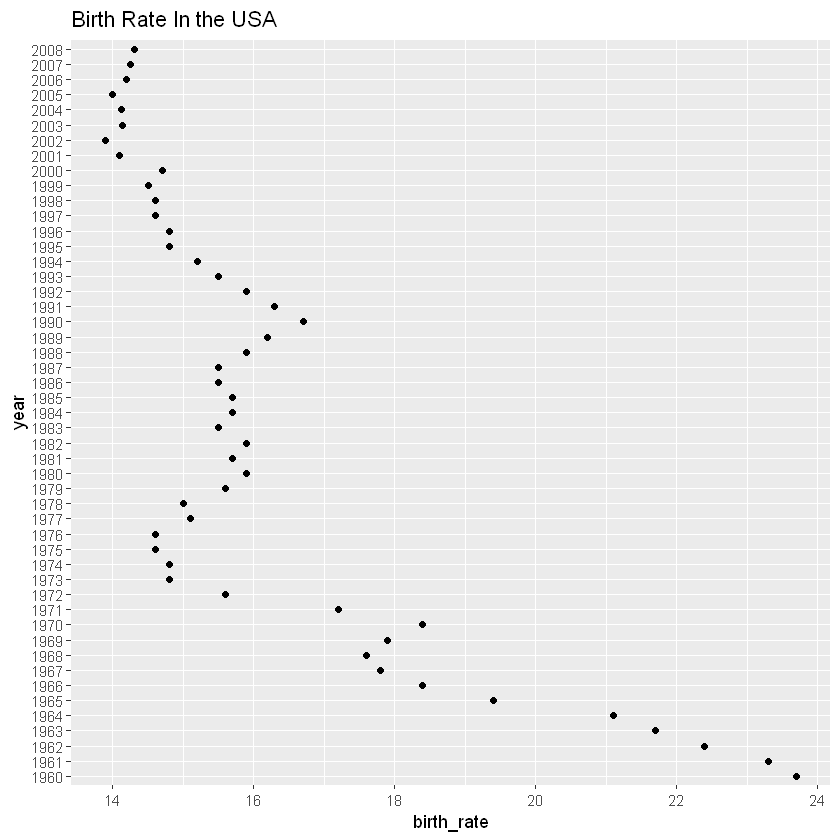

In [10]:
ggplot(birth_rates_USA_pivot, aes(x=year, y=birth_rate)) + geom_point() + coord_flip() + ggtitle("Birth Rate In the USA")

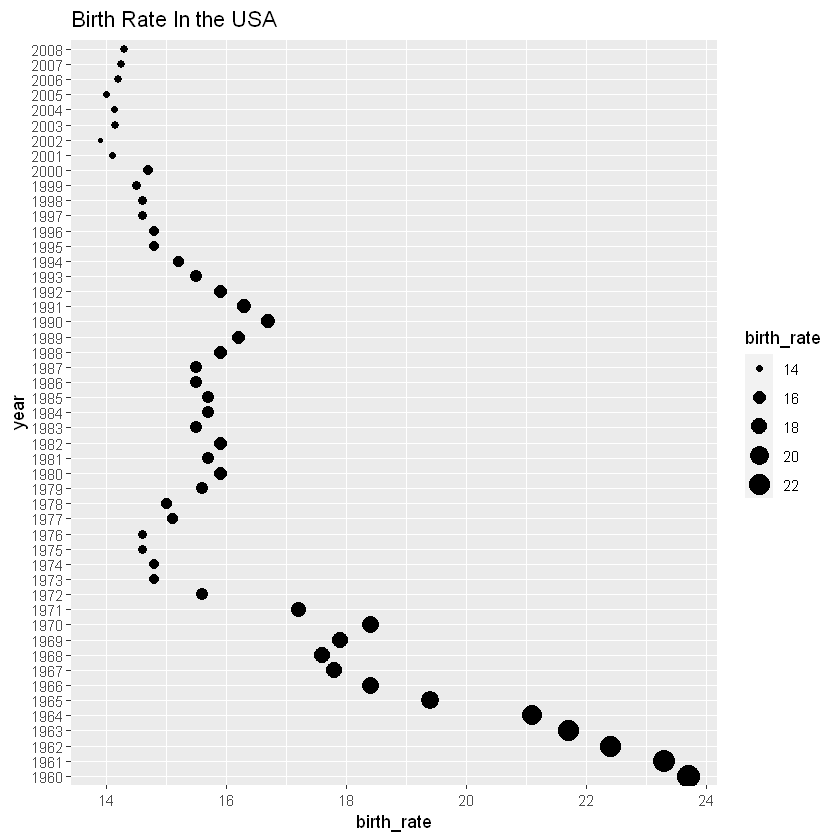

In [13]:
ggplot(birth_rates_USA_pivot, aes(x=year, y=birth_rate)) + geom_point(aes(size=birth_rate)) + coord_flip() + ggtitle("Birth Rate In the USA")

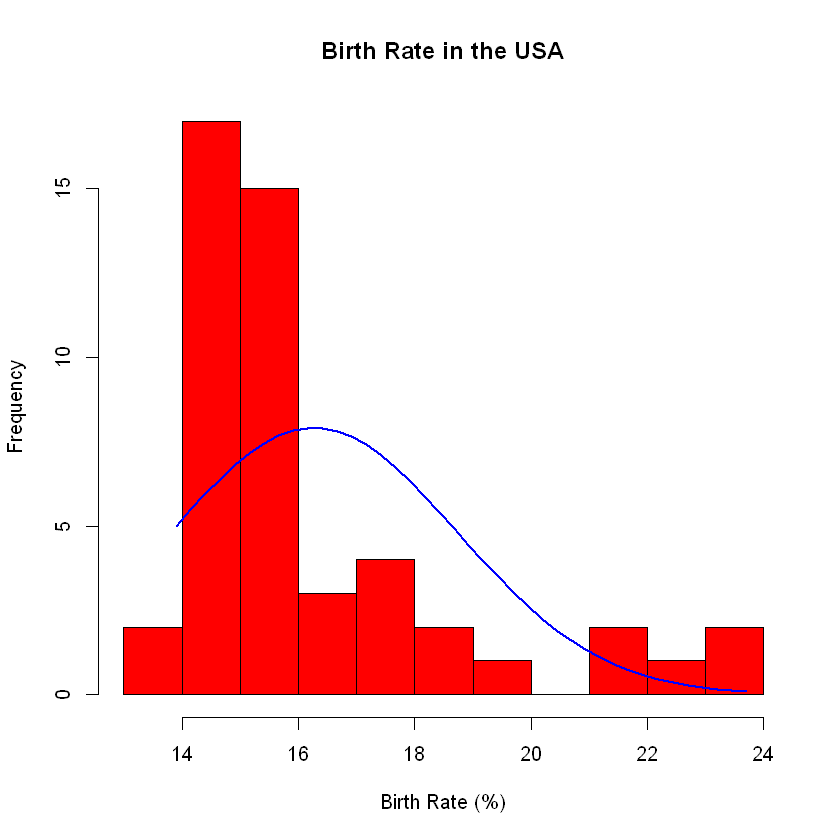

In [15]:
x <- birth_rates_USA_pivot$birth_rate
h<-hist(x, breaks=10, col="red", xlab="Birth Rate (%)",
   main="Birth Rate in the USA")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)